In [1]:
import json
import pandas as pd
import networkx as nx
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from itertools import groupby
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4
from itertools import zip_longest

In [2]:
G = nx.Graph()

In [3]:
citation_network = pd.read_csv('citation_network_data.csv')
citation_network = citation_network.rename(columns = {'count':'weight'})

In [6]:
citation_network['title_x'].head().tolist()

['"Could Be Raining"',
 '"Democracy as Defeat"',
 '"Democracy as Defeat"',
 '"Democracy as Defeat"',
 '"Democracy as Defeat"']

In [209]:
G.clear()
G = nx.Graph()
G = nx.from_pandas_edgelist(citation_network, 'title_x', 'title_y', ['weight'])

In [64]:
x_list = citation_network['title_x'].tolist()
y_list = citation_network['title_y'].tolist()
weight_list = citation_network['count'].tolist()

In [68]:
network_dict = dict(zip(x_list, y_list))

In [80]:
G = nx.Graph(network_dict)

In [94]:
G.number_of_nodes()

45322

The below section creates a graph network for a single paper only

In [21]:
author_paper = citation_network[citation_network['title_x']=='Thyroid hormones for acute kidney injury']

In [22]:
author_x_list = author_paper['title_x'].tolist()
author_y_list = author_paper['title_y'].tolist()

In [23]:
elist = []

for item in zip(author_x_list,author_y_list):
    elist.append(item)

In [25]:
G = nx.Graph(elist)

In [90]:
print(G.number_of_nodes())
print(G.number_of_edges())

0
0


c:\users\j_m_g\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


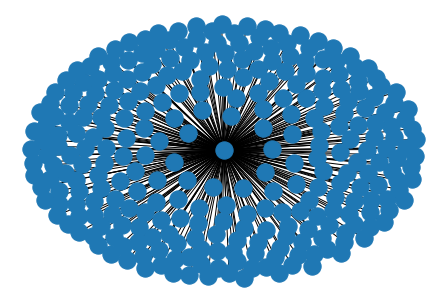

In [27]:
nx.draw(G, with_labels=False, font_weight='bold')

The below section creates a graph network for all papers connected to the single paper chosen above

In [31]:
ref_list = author_paper['title_y']

In [32]:
ref_list[0]

KeyError: 0

In [33]:
extended_network = citation_network.loc[citation_network['title_x'].isin(ref_list)]

In [34]:
extended_x_list = extended_network['title_x'].tolist()
extended_y_list = extended_network['title_y'].tolist()

In [35]:
extendedlist = []

for item in zip(extended_x_list,extended_y_list):
    extendedlist.append(item)

In [36]:
G.clear()
G = nx.Graph(extendedlist)

In [37]:
print(G.number_of_nodes())
print(G.number_of_edges())

7138
79252


MemoryError: Unable to allocate array with shape (7138, 7138, 2) and data type float64

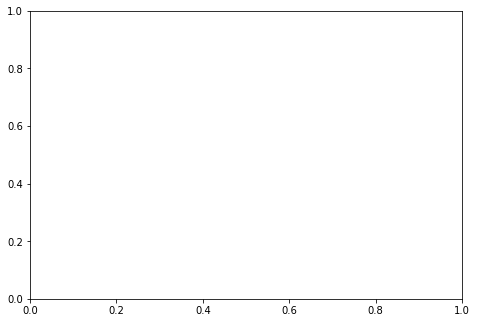

In [38]:
nx.draw(G, with_labels=False, font_weight='bold')

In [89]:
#This will cut the output down to only papers with 3 or more connections - 
   #Remember these can be connections to papers with a single connection, therefore some could look like they have less than the required 3 connections
    
G.clear()
G = nx.Graph()
G = nx.from_pandas_edgelist(citation_network, 'title_x', 'title_y', ['weight'])

edge_weight_cutoff = 5
node_degree_cutoff = 10
    
remove_edges = [(u,v) for u,v,e in G.edges(data=True) if e['weight'] < edge_weight_cutoff]
G.remove_edges_from(remove_edges)

remove_nodes = [node for node,degree in G.degree() if degree < node_degree_cutoff]
G.remove_nodes_from(remove_nodes)

In [90]:
print(G.number_of_nodes())
print(G.number_of_edges())

1412
7649


In [12]:
remove_edges

[('Exploring the Nature of Third Places and Local Social Ties in High-Density Areas: The Case of a Large Mixed-Use Complex',
  '"I wouldn\'t choose that key ring; it\'s not me"'),
 ('Exploring the Nature of Third Places and Local Social Ties in High-Density Areas: The Case of a Large Mixed-Use Complex',
  'A Case Study of a Sport-for-Development Programme in Brazil'),
 ('Exploring the Nature of Third Places and Local Social Ties in High-Density Areas: The Case of a Large Mixed-Use Complex',
  'A Consensus on Stroke'),
 ('Exploring the Nature of Third Places and Local Social Ties in High-Density Areas: The Case of a Large Mixed-Use Complex',
  'A Pilot Study of a Method for Teaching Clinical Psychology Trainees to Conceptualise and Manage Countertransference'),
 ('Exploring the Nature of Third Places and Local Social Ties in High-Density Areas: The Case of a Large Mixed-Use Complex',
  'A Qualitative Analysis of the Portrayal of Young People and Psychosis in Australian News Reports'),
 

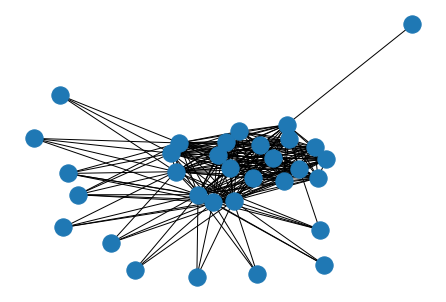

In [44]:
nx.draw(G, with_labels=False, font_weight='bold')

In [92]:
edge_attrs['edge_color']

KeyError: 'edge_color'

In [91]:
BASIC_DEGREE, HIGHER_DEGREE = "black", "red"
edge_attrs = {}

for node,degree in G.degree():
    edge_color = BASIC_DEGREE if degree == 3 else HIGHER_DEGREE
    edge_attrs[(node)] = edge_color
    
#nx.set_edge_attributes(G, edge_attrs, "edge_color")

plot = Plot(plot_width=1200, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Graph Interaction Demonstration"
node_hover_tool = HoverTool(line_policy = 'interp', tooltips=[("Title", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=12, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

#graph_renderer.selection_policy = NodesAndLinkedEdges()
#graph_renderer.inspection_policy=EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)